# Classification of Eligibility of Patients to go through Operation

 This is dataset consists of information of  Brazil patients who are eligible for operation based on condition of Bone,Blood,Lung,Skin,Urological,Heart,Other,Criticality 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import math
import seaborn as sns
from scipy import stats
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [3]:
patients=pd.read_csv("Brazil_Patients_Data.csv")
patients.head()

,Patient_ID,Age,Region,Bone,Blood,Lung,Skin,Urological,Heart,Other,Criticality,Operation
0,43191,64.0,Rio De Janerio,1733.0,1141.0,1114.0,118.0,780.0,8915.0,4029.0,Level-1,No
1,43221,78.0,Sao Paulo,1789.0,1205.0,1278.0,126.0,915.0,9589.0,4276.0,Level-2,No
2,43252,81.0,Manaus,1907.0,1143.0,1149.0,119.0,856.0,9339.0,4165.0,Level-3,Yes
3,43282,77.0,Salvador,1730.0,1210.0,1303.0,124.0,906.0,9710.0,4437.0,Level-3,Yes
4,43313,72.0,Curitiba,1733.0,1193.0,1177.0,115.0,871.0,9259.0,4170.0,Level-3,Yes


In [4]:
patients.shape

(2502, 12)

# EDA

In [5]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   2502 non-null   int64  
 1   Age          2496 non-null   float64
 2   Region       2502 non-null   object 
 3   Bone         2499 non-null   float64
 4   Blood        2499 non-null   float64
 5   Lung         2494 non-null   float64
 6   Skin         2497 non-null   float64
 7   Urological   2499 non-null   float64
 8   Heart        2493 non-null   float64
 9   Other        2500 non-null   float64
 10  Criticality  2502 non-null   object 
 11  Operation    2502 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 234.7+ KB


In [6]:
patients.describe()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other
count,2502.000000,2496.000000,2499.000000,2499.000000,2494.000000,2497.000000,2499.000000,2493.000000,2500.000000
mean,49036.891687,74.883013,6338.392157,2831.777111,2533.215718,3519.861834,1186.064426,28169.691937,7840.073200
std,3467.697487,7.024430,3302.313609,1493.556560,1374.005987,2240.896920,1716.933672,14674.423459,3742.536141
min,43191.000000,-10.000000,1052.000000,508.000000,405.000000,102.000000,303.000000,5770.000000,2102.000000
25%,46016.500000,70.000000,3371.000000,1484.000000,1243.250000,1470.000000,558.000000,14519.000000,4242.250000
50%,49057.500000,75.000000,6198.000000,2695.000000,2474.500000,3589.000000,784.000000,27121.000000,7670.500000
75%,52042.000000,80.000000,9426.500000,4172.000000,3765.250000,5553.000000,998.000000,41873.000000,11352.750000
max,54992.000000,220.000000,12103.000000,5851.000000,5003.000000,7303.000000,11019.000000,53791.000000,14281.000000


### Finding Duplicates 

In [7]:
patients[patients.duplicated()]

,Patient_ID,Age,Region,Bone,Blood,Lung,Skin,Urological,Heart,Other,Criticality,Operation
86,50258,70.0,Natal,1900.0,1127.0,1145.0,118.0,848.0,9281.0,4143.0,Level-3,Yes
386,53112,83.0,Manaus,2511.0,568.0,1095.0,276.0,1896.0,8599.0,2253.0,Level-2,Yes


In [8]:
patients=patients.drop_duplicates()

In [9]:
patients.shape

(2500, 12)

### Null Value Checks

In [10]:
patients.isnull().sum()

Patient_ID     0
Age            6
Region         0
Bone           3
Blood          3
Lung           8
Skin           5
Urological     3
Heart          9
Other          2
Criticality    0
Operation      0
dtype: int64

In [11]:
patients.fillna(patients.mean(),inplace=True)

In [12]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2501
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   2500 non-null   int64  
 1   Age          2500 non-null   float64
 2   Region       2500 non-null   object 
 3   Bone         2500 non-null   float64
 4   Blood        2500 non-null   float64
 5   Lung         2500 non-null   float64
 6   Skin         2500 non-null   float64
 7   Urological   2500 non-null   float64
 8   Heart        2500 non-null   float64
 9   Other        2500 non-null   float64
 10  Criticality  2500 non-null   object 
 11  Operation    2500 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 253.9+ KB


### statistical check

In [13]:
patients.describe()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,49034.773200,74.881716,6341.702443,2833.366440,2534.349920,3522.525451,1185.915499,28185.131273,7843.789832
std,3468.040256,7.016248,3299.568997,1492.180407,1371.772406,2237.575006,1716.518039,14643.744068,3740.133992
min,43191.000000,-10.000000,1052.000000,508.000000,405.000000,102.000000,303.000000,5770.000000,2102.000000
25%,46014.750000,70.000000,3374.750000,1489.250000,1248.750000,1479.750000,558.000000,14571.750000,4248.500000
50%,49047.500000,75.000000,6210.000000,2703.500000,2483.000000,3588.000000,785.000000,27209.500000,7701.000000
75%,52042.000000,80.000000,9425.250000,4171.000000,3759.250000,5547.000000,998.250000,41861.250000,11352.750000
max,54992.000000,220.000000,12103.000000,5851.000000,5003.000000,7303.000000,11019.000000,53791.000000,14281.000000


### Outliers check

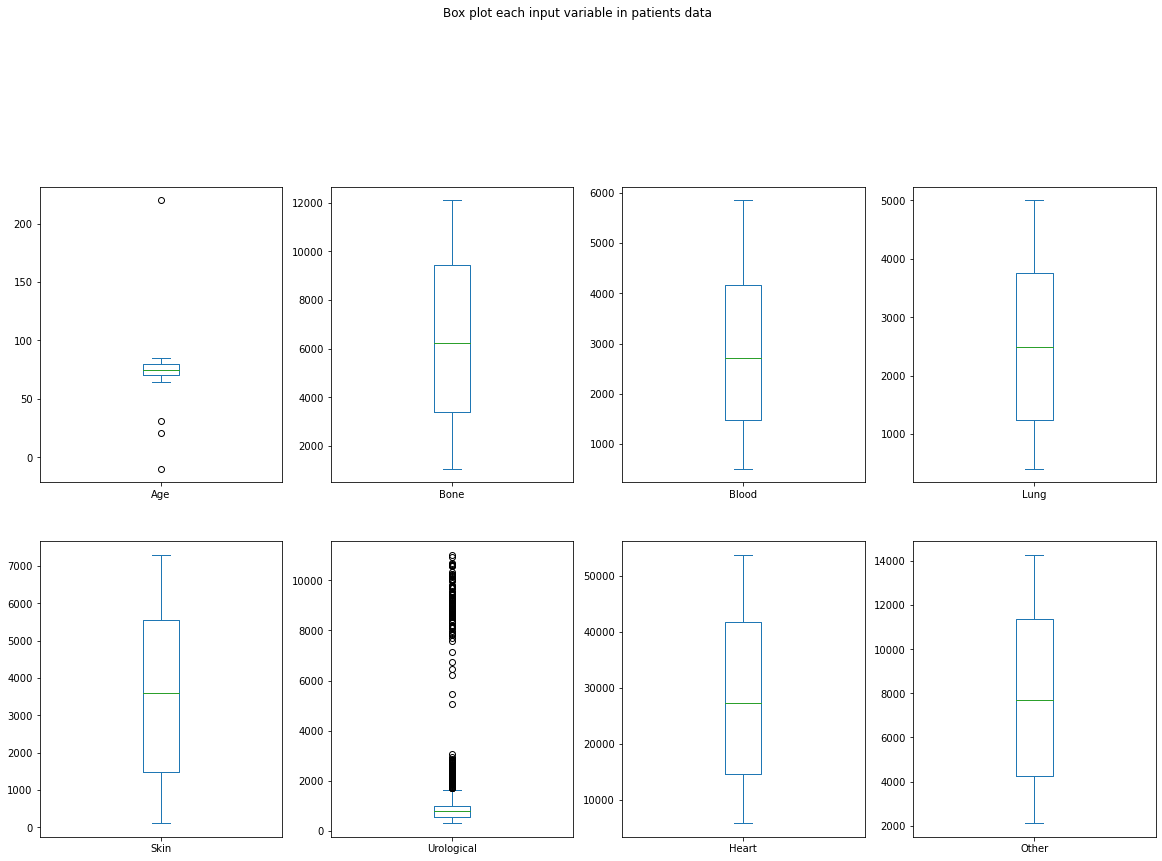

In [14]:
drop_cols=['Patient_ID','Region','Criticality','Operation']
patients.drop(drop_cols,axis=1).plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,figsize=(20,25),
                                     title="Box plot each input variable in patients data ")
plt.show()

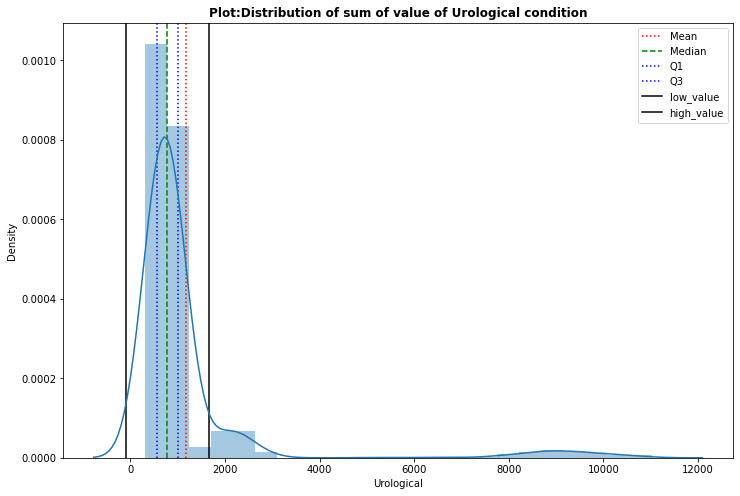

In [15]:
Q1=np.percentile(patients['Urological'],25)
Q3=np.percentile(patients['Urological'],75)
iqr_value=stats.iqr(patients['Urological'])

low_value=Q1-iqr_value*1.5
high_value=Q3+iqr_value*1.5

mean_weight=np.mean(patients['Urological'])
median_weight=np.median(patients['Urological'])

plt.figure(figsize=(12,8))
plt.title("Plot:Distribution of sum of value of Urological condition",weight="bold")

plt.axvline(x=mean_weight,color='r',ls=":",label='Mean')
plt.axvline(x=median_weight,color='g',ls="--",label="Median")
plt.axvline(x=Q1,color="b",ls=":",label="Q1")
plt.axvline(x=Q3,color="b",ls=":",label="Q3")
plt.axvline(x=low_value,color="black",ls="-",label="low_value")
plt.axvline(x=high_value,color="black",ls="-",label="high_value")
plt.legend()

sns.distplot(patients['Urological'],bins=23)
plt.show()

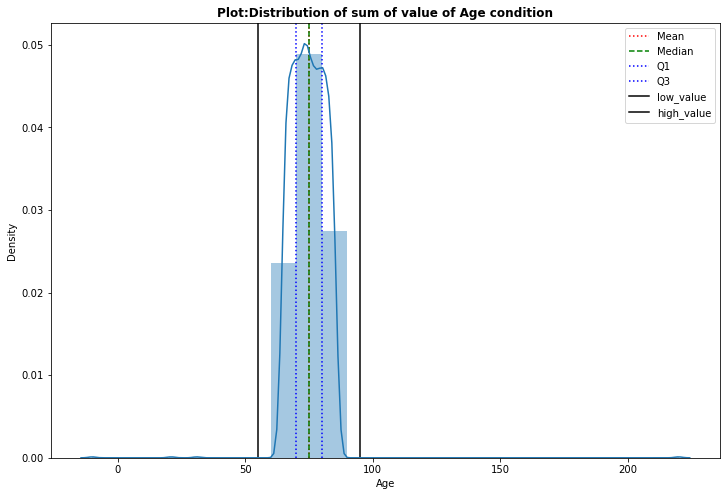

In [16]:
Q1=np.percentile(patients['Age'],25)
Q3=np.percentile(patients['Age'],75)
iqr_value=stats.iqr(patients['Age'])

low_value=Q1-iqr_value*1.5
high_value=Q3+iqr_value*1.5

mean_weight=np.mean(patients['Age'])
median_weight=np.median(patients['Age'])

plt.figure(figsize=(12,8))
plt.title("Plot:Distribution of sum of value of Age condition",weight="bold")
plt.axvline(x=mean_weight,color='r',ls=":",label='Mean')
plt.axvline(x=median_weight,color='g',ls="--",label="Median")
plt.axvline(x=Q1,color="b",ls=":",label="Q1")
plt.axvline(x=Q3,color="b",ls=":",label="Q3")
plt.axvline(x=low_value,color="black",ls="-",label="low_value")
plt.axvline(x=high_value,color="black",ls="-",label="high_value")
plt.legend()
sns.distplot(patients['Age'],bins=23)
plt.show()

### Replacing outliers with median value

In [17]:
median1 = patients.loc[patients['Age']<85, 'Age'].median()
patients.loc[patients.Age > 85, 'Age'] = np.nan
patients.fillna(median1,inplace=True)

In [18]:
median2 = patients.loc[patients['Age']>65, 'Age'].median()
patients.loc[patients.Age<65,'Age']=np.nan
patients.fillna(median2,inplace=True)

In [19]:
median3=patients.loc[patients['Urological']<1400,'Urological'].median()
patients.loc[patients['Urological']>1400,'Urological']=np.nan
patients.fillna(median3,inplace=True)

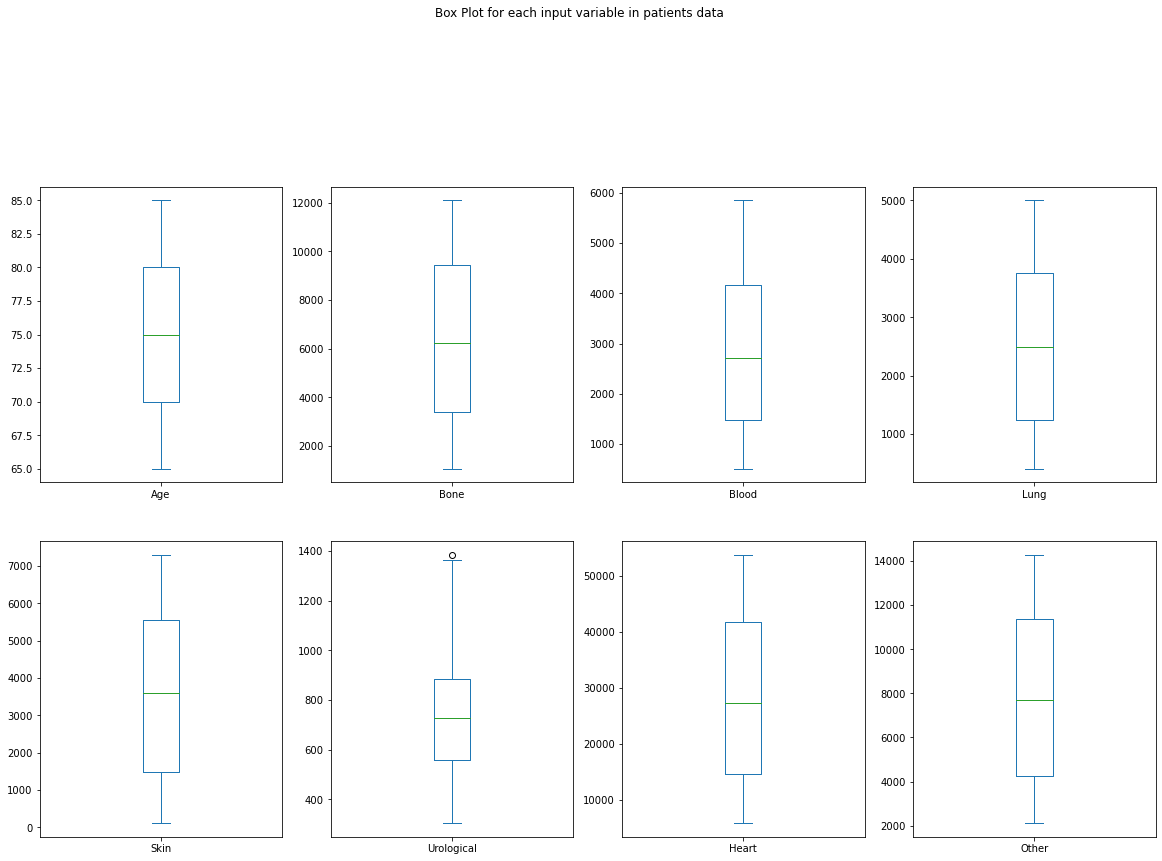

In [20]:
drop_cols=['Patient_ID','Region','Criticality','Operation']
patients.drop(drop_cols,axis=1).plot(kind="box",subplots=True,layout=(4,4),figsize=(20,25),sharex=False,sharey=False,
                                    title="Box Plot for each input variable in patients data")
plt.savefig("Patients_Boxplot")
plt.show()

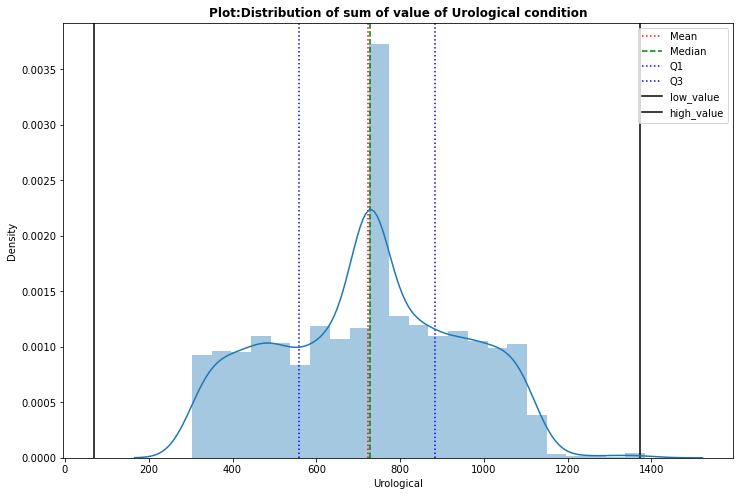

In [21]:
Q1=np.percentile(patients['Urological'],25)
Q3=np.percentile(patients['Urological'],75)
iqr_value=stats.iqr(patients['Urological'])

low_value=Q1-iqr_value*1.5
high_value=Q3+iqr_value*1.5

mean_weight=np.mean(patients['Urological'])
median_weight=np.median(patients['Urological'])

plt.figure(figsize=(12,8))
plt.title("Plot:Distribution of sum of value of Urological condition",weight="bold")

plt.axvline(x=mean_weight,color='r',ls=":",label='Mean')
plt.axvline(x=median_weight,color='g',ls="--",label="Median")
plt.axvline(x=Q1,color="b",ls=":",label="Q1")
plt.axvline(x=Q3,color="b",ls=":",label="Q3")
plt.axvline(x=low_value,color="black",ls="-",label="low_value")
plt.axvline(x=high_value,color="black",ls="-",label="high_value")
plt.legend()

sns.distplot(patients['Urological'],bins=23)
plt.show()

In [22]:
patients.describe()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,49034.773200,74.900916,6341.702443,2833.366440,2534.349920,3522.525451,724.118699,28185.131273,7843.789832
std,3468.040256,5.994814,3299.568997,1492.180407,1371.772406,2237.575006,218.224985,14643.744068,3740.133992
min,43191.000000,65.000000,1052.000000,508.000000,405.000000,102.000000,303.000000,5770.000000,2102.000000
25%,46014.750000,70.000000,3374.750000,1489.250000,1248.750000,1479.750000,558.000000,14571.750000,4248.500000
50%,49047.500000,75.000000,6210.000000,2703.500000,2483.000000,3588.000000,729.000000,27209.500000,7701.000000
75%,52042.000000,80.000000,9425.250000,4171.000000,3759.250000,5547.000000,884.250000,41861.250000,11352.750000
max,54992.000000,85.000000,12103.000000,5851.000000,5003.000000,7303.000000,1385.000000,53791.000000,14281.000000


In [23]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2501
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   2500 non-null   int64  
 1   Age          2500 non-null   float64
 2   Region       2500 non-null   object 
 3   Bone         2500 non-null   float64
 4   Blood        2500 non-null   float64
 5   Lung         2500 non-null   float64
 6   Skin         2500 non-null   float64
 7   Urological   2500 non-null   float64
 8   Heart        2500 non-null   float64
 9   Other        2500 non-null   float64
 10  Criticality  2500 non-null   object 
 11  Operation    2500 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 253.9+ KB


### Label Encoding

In [24]:
patients['Criticality'].unique()

array(['Level-1', 'Level-2', 'Level-3'], dtype=object)

In [25]:
patients['Operation'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
label_encoder=LabelEncoder()
patients['Criticality']=label_encoder.fit_transform(patients['Criticality'])
patients['Operation']=label_encoder.fit_transform(patients['Operation'])

In [27]:
patients['Criticality'].unique()

array([0, 1, 2])

In [28]:
patients['Operation'].unique()

array([0, 1])

In [29]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2501
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   2500 non-null   int64  
 1   Age          2500 non-null   float64
 2   Region       2500 non-null   object 
 3   Bone         2500 non-null   float64
 4   Blood        2500 non-null   float64
 5   Lung         2500 non-null   float64
 6   Skin         2500 non-null   float64
 7   Urological   2500 non-null   float64
 8   Heart        2500 non-null   float64
 9   Other        2500 non-null   float64
 10  Criticality  2500 non-null   int32  
 11  Operation    2500 non-null   int32  
dtypes: float64(8), int32(2), int64(1), object(1)
memory usage: 234.4+ KB


In [30]:
patients.head()

,Patient_ID,Age,Region,Bone,Blood,Lung,Skin,Urological,Heart,Other,Criticality,Operation
0,43191,75.0,Rio De Janerio,1733.0,1141.0,1114.0,118.0,780.0,8915.0,4029.0,0,0
1,43221,78.0,Sao Paulo,1789.0,1205.0,1278.0,126.0,915.0,9589.0,4276.0,1,0
2,43252,81.0,Manaus,1907.0,1143.0,1149.0,119.0,856.0,9339.0,4165.0,2,1
3,43282,77.0,Salvador,1730.0,1210.0,1303.0,124.0,906.0,9710.0,4437.0,2,1
4,43313,72.0,Curitiba,1733.0,1193.0,1177.0,115.0,871.0,9259.0,4170.0,2,1


<AxesSubplot:xlabel='Operation', ylabel='count'>

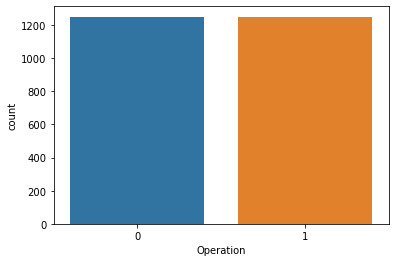

In [31]:
sns.countplot(patients['Operation'],label='count')

### Correlation check

In [32]:
patients.corr()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other,Criticality,Operation
Patient_ID,1.000000,0.006164,0.047456,0.024094,0.030261,0.035089,-0.018396,0.032704,0.030825,0.023343,0.015518
Age,0.006164,1.000000,-0.014413,-0.017965,0.024664,0.003080,0.015233,-0.011696,0.006814,-0.002860,0.278808
Bone,0.047456,-0.014413,1.000000,0.227860,0.250278,0.200081,-0.066119,0.241890,0.246951,0.007217,0.044102
Blood,0.024094,-0.017965,0.227860,1.000000,0.215579,0.214793,-0.017012,0.243860,0.226402,-0.027343,-0.014961
Lung,0.030261,0.024664,0.250278,0.215579,1.000000,0.139930,-0.036353,0.246369,0.279450,-0.017831,0.030637
Skin,0.035089,0.003080,0.200081,0.214793,0.139930,1.000000,-0.029729,0.191700,0.177752,-0.005618,0.012694
Urological,-0.018396,0.015233,-0.066119,-0.017012,-0.036353,-0.029729,1.000000,-0.039932,-0.051569,0.005878,-0.030197
Heart,0.032704,-0.011696,0.241890,0.243860,0.246369,0.191700,-0.039932,1.000000,0.246147,-0.012639,0.011341
Other,0.030825,0.006814,0.246951,0.226402,0.279450,0.177752,-0.051569,0.246147,1.000000,-0.003517,-0.003759
Criticality,0.023343,-0.002860,0.007217,-0.027343,-0.017831,-0.005618,0.005878,-0.012639,-0.003517,1.000000,0.383495


<AxesSubplot:>

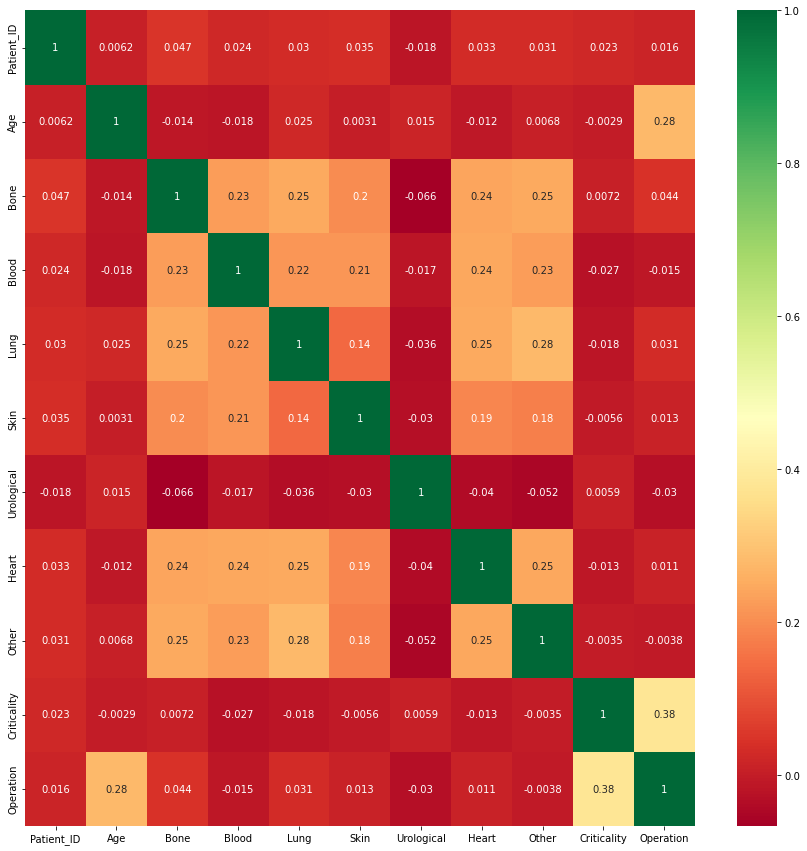

In [33]:
corr=patients.corr()
plt.figure(figsize=(15,15))
sns.heatmap(patients.corr(),annot=True,cmap="RdYlGn")

### Observation:

- input Features are not highly correlated with target variable.
- Age(0.28) and criticality(0.38) have some positive correlation with  operation.

### Histogram

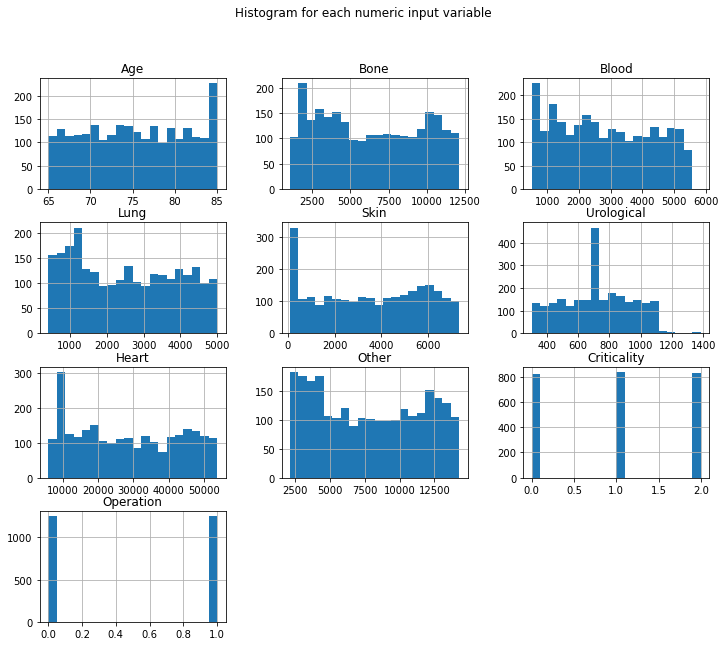

In [35]:
feature_drop=['Patient_ID','Region']
patients.drop(feature_drop,axis=1).hist(bins=20,figsize=(12,10))
plt.suptitle("Histogram for each numeric input variable")
plt.show()

### Pair Plot

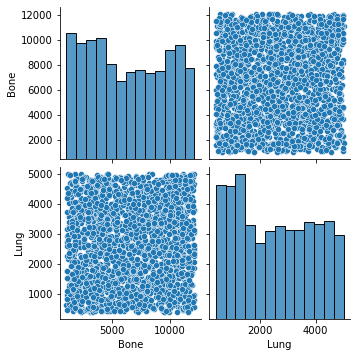

In [36]:
sns.pairplot(patients[['Bone','Lung']])

### Insights

<AxesSubplot:xlabel='Age'>

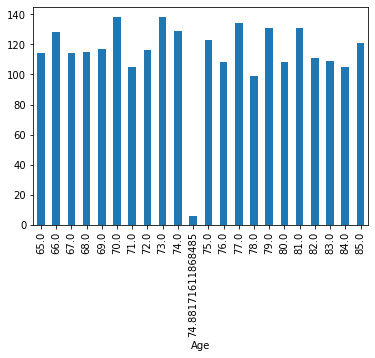

In [37]:
#Relation with Age with Criticality
patients.groupby('Age')['Criticality'].count().plot(kind='bar')

<AxesSubplot:xlabel='Region'>

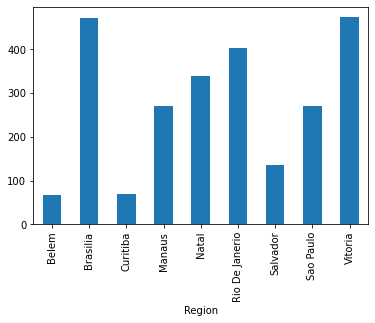

In [38]:
#Region with highest patients count
patients.groupby('Region')['Patient_ID'].count().plot(kind='bar')

- In this dataset Brasilia and vitoria have more number of patients

<AxesSubplot:xlabel='Criticality,Operation'>

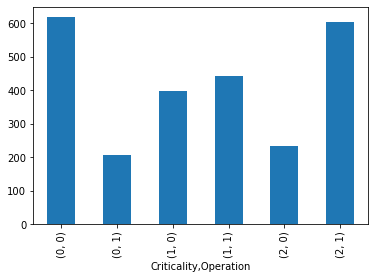

In [39]:
patients.groupby(['Criticality','Operation'])["Patient_ID"].count().plot(kind='bar')

- Observation:
 - From above plot,we can see that 
 - if patients  with level-1 critility ,then number of people denied for operation are more and eligible for operation are less 
 - if patients  with level-2 critility ,then number of people denied for operation  and eligible for operation not varied much.
 - if patients  with level-3 critility ,then number of people denied for operation are less and eligible for operation are more

<AxesSubplot:ylabel='Patient_ID'>

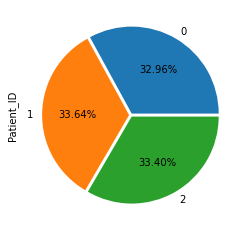

In [40]:
#Division of criticality with patient count percentage
patients.groupby('Criticality')['Patient_ID'].count().plot(kind="pie",explode=(0.02,0.02,0.02),autopct="%0.2f%%")

- dataset contains equal no. data for all criticality levels

### Data Preparation

In [41]:
patients.columns

Index(['Patient_ID', 'Age', 'Region', 'Bone', 'Blood', 'Lung', 'Skin',
       'Urological', 'Heart', 'Other', 'Criticality', 'Operation'],
      dtype='object')

In [42]:
feature_names=['Age','Bone','Blood','Lung', 'Skin','Urological', 'Heart', 'Other', 'Criticality']
X=patients[feature_names]
y=patients['Operation']

### Train Test split

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

### Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Logistic Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

## Accuracy Check

In [46]:
print("Accuracy of Logistic regression on Training data: {:.2f}"
     .format(logreg.score(X_train,y_train)))
print("Accuracy of Logistic regression on testing data : {:.2f}"
     .format(logreg.score(X_test,y_test)))

Accuracy of Logistic regression on Training data: 0.65
Accuracy of Logistic regression on testing data : 0.68


### Train Test split with test size

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

### Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

### Accuracy Check

In [50]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(logreg.score(X_train,y_train)))
print('Accuracy of Logistic regression classifier on testing set: {:.2f}'
      .format(logreg.score(X_test,y_test)))
      


Accuracy of Logistic regression classifier on training set: 0.65
Accuracy of Logistic regression classifier on testing set: 0.69


In [51]:
predictions=logreg.predict(X_test)

In [52]:
df=pd.DataFrame({'Actual':y_test,'pred':predictions})
df

,Actual,pred
1449,1,1
1116,1,0
1066,1,1
2289,1,1
1539,1,1
...,...,...
429,1,1
106,1,1
2046,1,0
122,1,0


In [53]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,auc,roc_curve

In [54]:
#precison and recall
print("precision of logistic regression classifier on test set: {:.2f}"
      .format(precision_score(y_test,predictions)))
print("recall of logistic regression classifier on test set:{:.2f}"
     .format(recall_score(y_test,predictions)))

precision of logistic regression classifier on test set: 0.72
recall of logistic regression classifier on test set:0.68


In [55]:
#confusion matrix and classification report
print("confusion_matrix\n\n",confusion_matrix(y_test,predictions),"\n\n")
print("classification_report\n\n",classification_report(y_test,predictions))

confusion_matrix

 [[248 107]
 [126 269]] 


classification_report

               precision    recall  f1-score   support

           0       0.66      0.70      0.68       355
           1       0.72      0.68      0.70       395

    accuracy                           0.69       750
   macro avg       0.69      0.69      0.69       750
weighted avg       0.69      0.69      0.69       750



- Observation:
    * Here,Recall is best metric to evaluate.which tells how many correct positive  predictions made out of all positive cases.
      correct predicton of patients who are eligibile for operation out of all eligible patients.
    * we need to decrease FN cases then recall value will increases

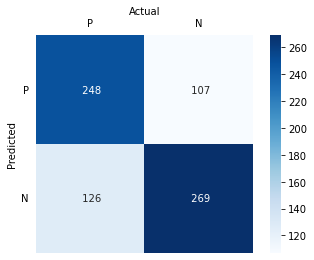

In [56]:
cf_matrix=confusion_matrix(y_test,predictions)
ax=sns.heatmap(cf_matrix,xticklabels='PN',yticklabels='PN',annot=True,square=True,cmap="Blues",fmt=" ",cbar_kws={'format':"%.0f"})
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.tick_params(top=False,bottom=False,left=False,right=False)
plt.yticks(rotation=0)
plt.show()

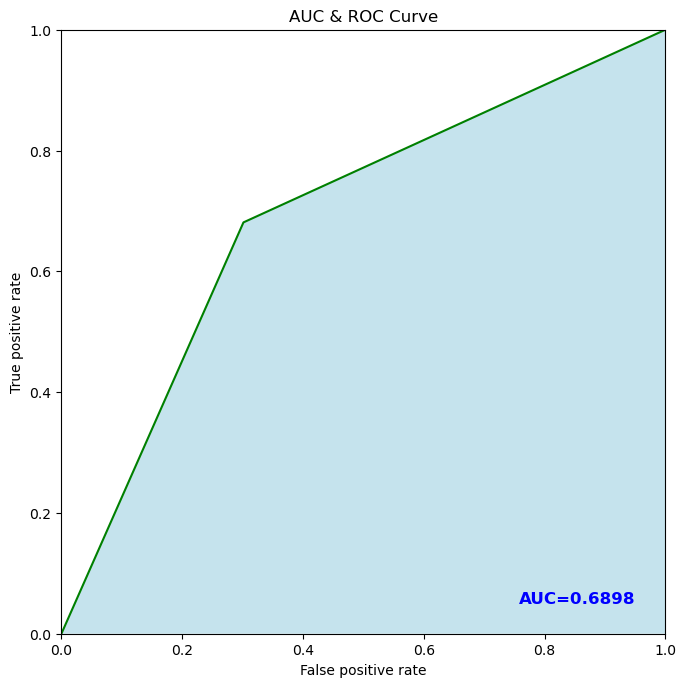

In [57]:
from sklearn import metrics
auc=metrics.roc_auc_score(y_test,predictions)
false_positive_rate,true_positive_rate,thresolds=metrics.roc_curve(y_test,predictions)
plt.figure(figsize=(10,8),dpi=100)
plt.axis('scaled')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate,true_positive_rate,'g')
plt.fill_between(false_positive_rate,true_positive_rate,facecolor='lightblue',alpha=0.7)
plt.text(0.95,0.05,'AUC=%0.4f' % auc,ha='right',fontsize=12,weight='bold',color='blue')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

### Logistic Regression with hyper parameter tuning

In [58]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model=LogisticRegression()
solvers=['newton-cg','sag','lbfgs','liblinear']
penalty=['l2']
c_values=[100,10,1.0,0.1,0.01,0.001]

#define grid search

grid=dict(solver=solvers,penalty=penalty,C=c_values)

cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=21)

grid_search=GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy',error_score=0)
grid_result=grid_search.fit(X_train,y_train)

pred_logreg=grid_result.predict(X_test)

#summarize results
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r"%(mean,stdev,param))

Best: 0.654095 using {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.640762 (0.026913) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.640762 (0.026913) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.640952 (0.026846) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.640762 (0.026913) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.640762 (0.026913) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.640762 (0.026913) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.640762 (0.026913) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.640952 (0.027048) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.641333 (0.027708) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.641333 (0.027708) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.641333 (0.027708) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.641524 (0.027082) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.640952 (0.025771) with: {'C': 0.1,

### Evolution for Logistic Regression

In [59]:
print("Precision of logistic regression classifier on test set: {:.2f}"
     .format(precision_score(y_test,pred_logreg)))
print("Recall of logistic regression classifier on test set: {:.2f}"
     .format(recall_score(y_test,pred_logreg)))

Precision of logistic regression classifier on test set: 0.65
Recall of logistic regression classifier on test set: 0.82


In [60]:
print(confusion_matrix(y_test,pred_logreg))
print(classification_report(y_test,pred_logreg))

[[181 174]
 [ 72 323]]
              precision    recall  f1-score   support

           0       0.72      0.51      0.60       355
           1       0.65      0.82      0.72       395

    accuracy                           0.67       750
   macro avg       0.68      0.66      0.66       750
weighted avg       0.68      0.67      0.66       750



- Observation:
        - Here recall is 82% ,so model is able to identified 82% eligiblity of operation correctly

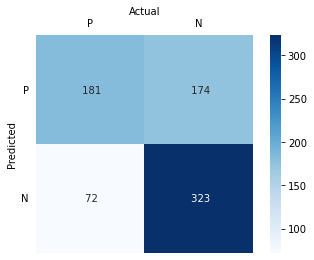

In [61]:
cf_matrix =confusion_matrix(y_test,pred_logreg)
ax=sns.heatmap(
     cf_matrix,xticklabels='PN',yticklabels='PN',annot=True,square=True,cmap="Blues",fmt=" ",cbar_kws={'format':"%.0f"})
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.tick_params(top=False,bottom=False,left=False,right=False)
plt.yticks(rotation=0)
plt.show()

FN cases has decreased

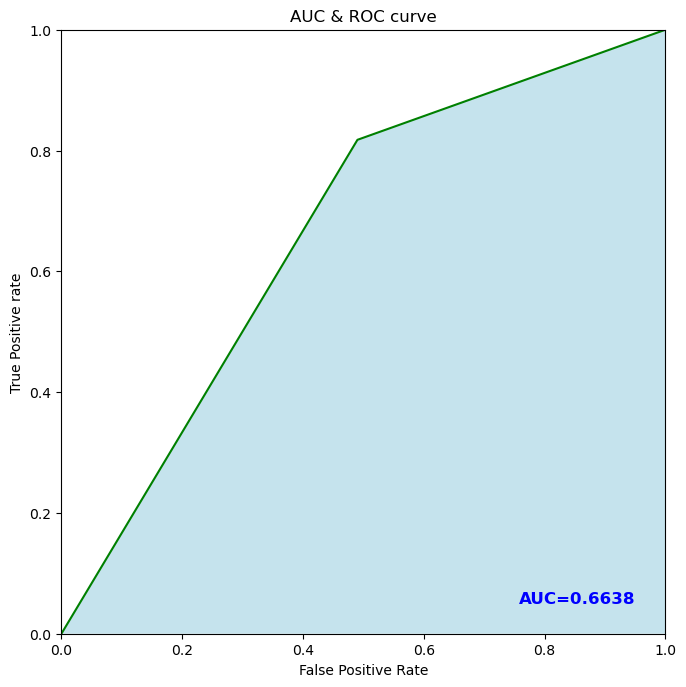

In [62]:
from sklearn import metrics
auc=metrics.roc_auc_score(y_test,pred_logreg)

false_positive_rate,true_positive_rate,thresolds=metrics.roc_curve(y_test,pred_logreg)

plt.figure(figsize=(10,8),dpi=100)
plt.axis('scaled')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC & ROC curve")
plt.plot(false_positive_rate,true_positive_rate,'g')
plt.fill_between(false_positive_rate,true_positive_rate,facecolor='lightblue',alpha=0.7)
plt.text(0.95,0.05,'AUC=%0.4f'%auc,ha='right',fontsize=12,weight='bold',color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.show()

# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
max_features = ['sqrt', 'log2']
max_depth=[2,4,6,8,10]
criterion=['gini','entropy']
max_leaf_nodes = [2,4,6,8]
min_samples_split=[1,2,3,4,5]
ccp_alpha=[0.01,0.02]

# define grid search
grid = dict(max_depth=max_depth,criterion=criterion,min_samples_split=min_samples_split,max_leaf_nodes=max_leaf_nodes,ccp_alpha=ccp_alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=21)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

pred_dt = grid_result.predict(X_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.658857 using {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.000000 (0.000000) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 1}
0.658857 (0.029698) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.658857 (0.029698) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 3}
0.658857 (0.029698) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 4}
0.658857 (0.029698) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 5}
0.000000 (0.000000) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 1}
0.647048 (0.023638) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 4, 'min_

# Evaluation Metrics for Decision Tree

In [64]:
print('Precision of Decision Tree classifier on test set: {:.2f}'
      .format(precision_score(y_test, pred_dt)))
print('Recall of Decision Tree classifier on test set: {:.2f}'
      .format(recall_score(y_test, pred_dt)))

Precision of Decision Tree classifier on test set: 0.65
Recall of Decision Tree classifier on test set: 0.83


In [65]:
print(confusion_matrix(y_test, pred_dt))
print(classification_report(y_test, pred_dt))

[[182 173]
 [ 67 328]]
              precision    recall  f1-score   support

           0       0.73      0.51      0.60       355
           1       0.65      0.83      0.73       395

    accuracy                           0.68       750
   macro avg       0.69      0.67      0.67       750
weighted avg       0.69      0.68      0.67       750



- Observation:
        - Here recall is 83% ,so model is able identified 83% eligiblity of operation correctly

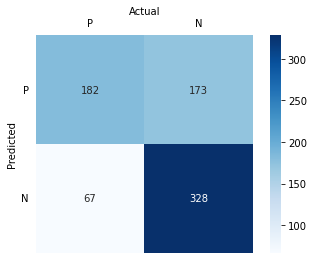

In [66]:
cf_matrix = confusion_matrix(y_test, pred_dt)
ax = sns.heatmap(
    cf_matrix,
    xticklabels='PN', yticklabels='PN',
    annot=True, square=True,
    cmap='Blues', fmt='', cbar_kws={'format': '%.0f'}
)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.tick_params(top=False, bottom=False, left=False, right=False)
plt.yticks(rotation=0)

plt.show()

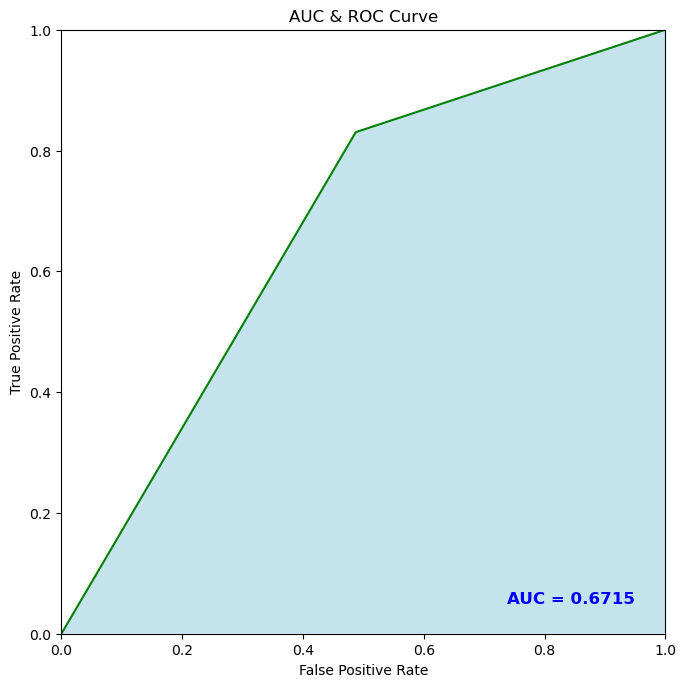

In [67]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, pred_dt)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, pred_dt)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

- Observation: 
   - Best Model -  Decision Tree based on Recall Score for medical cases.

# Statistical Tests

# Logistic Regressions

#### conducting T-test to check  significant difference between before and after hyperparameter tuning

In [71]:
from scipy.stats import ttest_ind
print("T-test of Logistic Regression and Logistic Regression with Hyperparameter tuning")
ttest_ind(predictions, pred_logreg)

T-test of Logistic Regression and Logistic Regression with Hyperparameter tuning


Ttest_indResult(statistic=-6.4163448883459155, pvalue=1.8676985248698939e-10)

pvalue is less than 0.05 and statistic is more than -2.
we have strong evidence that there is significant difference between before and after hyperparameter tuning on predictions

# Logistic Regression & Decision Tree

#### conducting T-test to check  significant difference between Logistic Regression & Decision Tree models

In [72]:
from scipy.stats import ttest_ind
print("T-test of Logistic Regression and Decision Tree")
ttest_ind(pred_logreg, pred_dt)

T-test of Logistic Regression and Decision Tree


Ttest_indResult(statistic=-0.2187286657727085, pvalue=0.826891212576356)

pvalue is more than 0.05 and statistic is less than -2.
we have strong evidence that there is no significant difference between Logistic Regression & Decision Tree models on predictions

# Summary:

- This dataset contains outliers in Age and Urological  features replaced them with median values
- Found out Age and Criticality had correlation with operation 0.28, 0.38 respectively
- Brasilia and Vitoria have more number of patients
- Number of people denied for operation are more in level-1 criticality and number of people eligible for operation are more in level-1 criticality
- considering recall is best metric for predictions, Logistic Regression model gave recall of 82% and Decision Tree model gave 83% to predict the eligiblity of operation correctly.
- Based on recall score Decision Tree is the best model. 